In [1]:
# numpy
import numpy as np

# pandas stuff
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# plotting stuff
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
colorMap = sns.light_palette("blue", as_cmap=True)
#plt.rcParams.update({'font.size': 12})


# install dabl
#!pip install dabl > /dev/null
#import dabl
# install datatable
#!pip install datatable > /dev/null
#import datatable as dt

# misc
import missingno as msno

# system
import warnings
warnings.filterwarnings('ignore')
# for the image import
import os
from IPython.display import Image
# garbage collector to keep RAM in check
import gc 

In [2]:
%%time
import dask.dataframe as dd
train_data = dd.read_parquet('/Users/apple/Masters/Job/kaggle/jane-street-real-time-market-data-forecasting/train.parquet')
train_data.head()

CPU times: user 1.54 s, sys: 576 ms, total: 2.11 s
Wall time: 2.23 s


,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8,partition_id
0,0,0,1,3.889038,NaN,NaN,NaN,NaN,NaN,0.851033,0.242971,0.263400,-0.891687,11,7,76,-0.883028,0.003067,-0.744703,NaN,-0.169586,NaN,-1.335938,-1.707803,0.910130,NaN,1.636431,1.522133,-1.551398,-0.229627,NaN,NaN,1.378301,-0.283712,0.123196,NaN,NaN,NaN,0.281180,0.269163,0.349028,-0.012596,-0.225932,NaN,-1.073602,NaN,NaN,-0.181716,NaN,NaN,NaN,0.564021,2.088506,0.832022,NaN,0.204797,NaN,NaN,-0.808103,NaN,-2.037683,0.727661,NaN,-0.989118,-0.345213,-1.36224,NaN,NaN,NaN,NaN,NaN,-1.251104,-0.110252,-0.491157,-1.022690,0.152241,-0.659864,NaN,NaN,-0.261412,-0.211486,-0.335556,-0.281498,0.738489,-0.069556,1.380875,2.005353,0.186018,1.218368,0.775981,0.346999,0.095504,0
1,0,0,7,1.370613,NaN,NaN,NaN,NaN,NaN,0.676961,0.151984,0.192465,-0.521729,11,7,76,-0.865307,-0.225629,-0.582163,NaN,0.317467,NaN,-1.250016,-1.682929,1.412757,NaN,0.520378,0.744132,-0.788658,0.641776,NaN,NaN,0.227200,0.580907,1.128879,NaN,NaN,NaN,-1.512286,-1.414357,-1.823322,-0.082763,-0.184119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.835207,-0.002704,-0.621836,NaN,1.172836,NaN,NaN,-1.625862,NaN,-1.410017,1.063013,NaN,0.888355,0.467994,-1.36224,NaN,NaN,NaN,NaN,NaN,-1.065759,0.013322,-0.592855,-1.052685,-0.393726,-0.741603,NaN,NaN,-0.281207,-0.182894,-0.245565,-0.302441,2.965889,1.190077,-0.523998,3.849921,2.626981,5.000000,0.703665,0.216683,0.778639,0
2,0,0,9,2.285698,NaN,NaN,NaN,NaN,NaN,1.056285,0.187227,0.249901,-0.773050,11,7,76,-0.675719,-0.199404,-0.586798,NaN,-0.814909,NaN,-1.296782,-2.040234,0.639589,NaN,1.597359,0.657514,-1.350148,0.364215,NaN,NaN,-0.017751,-0.317361,-0.122379,NaN,NaN,NaN,-0.320921,-0.958090,-2.436589,0.070999,-0.245239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.420632,-3.515137,-4.677760,NaN,0.535897,NaN,NaN,-0.725420,NaN,-2.294170,1.764551,NaN,-0.120789,-0.063458,-1.36224,NaN,NaN,NaN,NaN,NaN,-0.882604,-0.072482,-0.617934,-0.863230,-0.241892,-0.709919,NaN,NaN,0.377131,0.300724,-0.106842,-0.096792,-0.864488,-0.280303,-0.326697,0.375781,1.271291,0.099793,2.109352,0.670881,0.772828,0
3,0,0,10,0.690606,NaN,NaN,NaN,NaN,NaN,1.139366,0.273328,0.306549,-1.262223,42,5,150,-0.694008,3.004091,0.114809,NaN,-0.251882,NaN,-1.902009,-0.979447,0.241165,NaN,-0.392359,-0.224699,-2.129397,-0.855287,NaN,NaN,0.404142,-0.578156,0.105702,NaN,NaN,NaN,0.544138,-0.087091,-1.500147,-0.201288,-0.038042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.382074,2.669135,0.611711,NaN,2.413415,NaN,NaN,1.313203,NaN,-0.810125,2.939022,NaN,3.988801,1.834661,-1.36224,NaN,NaN,NaN,NaN,NaN,-0.697595,1.074309,-0.206929,-0.530602,4.765215,0.571554,NaN,NaN,-0.226891,-0.251412,-0.215522,-0.296244,0.408499,0.223992,2.294888,1.097444,1.225872,1.225376,1.114137,0.775199,-1.379516,0
4,0,0,14,0.440570,NaN,NaN,NaN,NaN,NaN,0.955200,0.262404,0.344457,-0.613813,44,3,16,-0.947351,-0.030018,-0.502379,NaN,0.646086,NaN,-1.844685,-1.586560,-0.182024,NaN,-0.969949,-0.673813,-1.282132,-1.399894,NaN,NaN,0.043815,-0.320225,-0.031713,NaN,NaN,NaN,-0.088420,-0.995003,-2.635336,-0.196461,-0.618719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.014600,

In [ ]:
# Compute the number of rows
row_count = len(train_data)

print(f"Total number of rows: {row_count}") # 47m rows

Total number of rows: 47127338


In [4]:
# Count the unique 'date_id' values
unique_dates = train_data['date_id'].nunique().compute()

print(f"Number of unique days (date_id): {unique_dates}")

Number of unique days (date_id): 1699


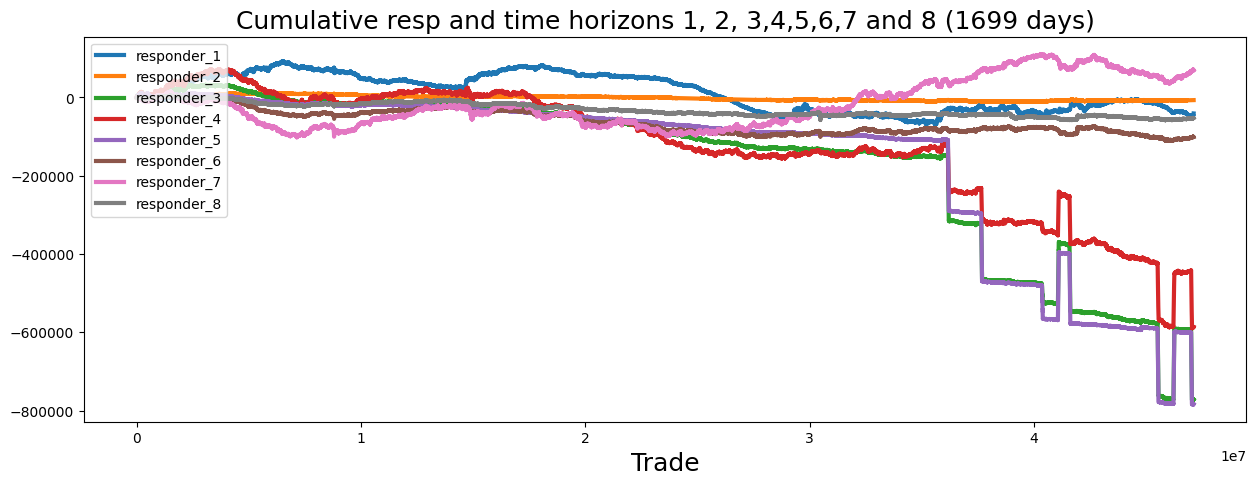

In [5]:
fig, ax = plt.subplots(figsize=(15, 5))
#balance= pd.Series(train_data['resp']).cumsum()
resp_1= pd.Series(train_data['responder_1']).cumsum()
resp_2= pd.Series(train_data['responder_2']).cumsum()
resp_3= pd.Series(train_data['responder_3']).cumsum()
resp_4= pd.Series(train_data['responder_4']).cumsum()
resp_5 = pd.Series(train_data['responder_5']).cumsum()
resp_6 = pd.Series(train_data['responder_6']).cumsum()
resp_7 = pd.Series(train_data['responder_7']).cumsum()
resp_8 = pd.Series(train_data['responder_8']).cumsum()
ax.set_xlabel ("Trade", fontsize=18)
ax.set_title ("Cumulative resp and time horizons 1, 2, 3,4,5,6,7 and 8 (1699 days)", fontsize=18)
#balance.plot(lw=3)
resp_1.plot(lw=3, label ='responder_1')
resp_2.plot(lw=3, label ='responder_2')
resp_3.plot(lw=3, label ='responder_3')
resp_4.plot(lw=3, label ='responder_4')
resp_5.plot(lw=3, label ='responder_5')
resp_6.plot(lw=3,label ='responder_6')
resp_7.plot(lw=3, label ='responder_7')
resp_8.plot(lw=3, label ='responder_8')
plt.legend(loc="upper left");
del resp_1
del resp_2
del resp_3
del resp_4
del resp_5
del resp_6
del resp_7
del resp_8
gc.collect();

The responder_4,5,6 

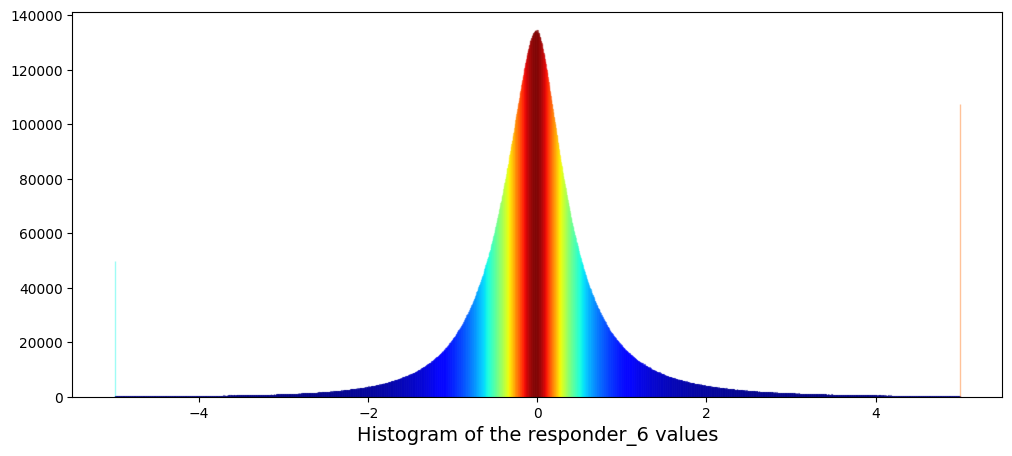

In [7]:
# Histogram of the target variable 'resp_6'
plt.figure(figsize = (12,5))
ax = sns.distplot(train_data['responder_6'], 
            bins=3000, 
            kde_kws={"clip":(-5,5)}, 
            hist_kws={"range":(-5,5)},
            color='darkcyan', 
            kde=False);
values = np.array([rec.get_height() for rec in ax.patches])
norm = plt.Normalize(values.min(), values.max())
colors = plt.cm.jet(norm(values))
for rec, col in zip(ax.patches, colors):
    rec.set_color(col)
plt.xlabel("Histogram of the responder_6 values", size=14)
plt.show();
gc.collect();


In [8]:
# Assuming train_data is a Dask DataFrame
# Compute the min and max values for responder_6
min_resp = train_data['responder_6'].min().compute()
print('The minimum value for resp is: %.5f' % min_resp)

max_resp = train_data['responder_6'].max().compute()
print('The maximum value for resp is: %.5f' % max_resp)

The minimum value for resp is: -5.00000
The maximum value for resp is: 5.00000


In [9]:
# Compute and print the skewness and kurtosis of responder_6
skew_resp = train_data['responder_6'].skew().compute()
kurt_resp = train_data['responder_6'].kurtosis().compute()

print("Skew of resp is:      %.2f" % skew_resp)
print("Kurtosis of resp is: %.2f"  % kurt_resp)

Skew of resp is:      0.47
Kurtosis of resp is: 6.86


Let us fit a Cauchy distribution

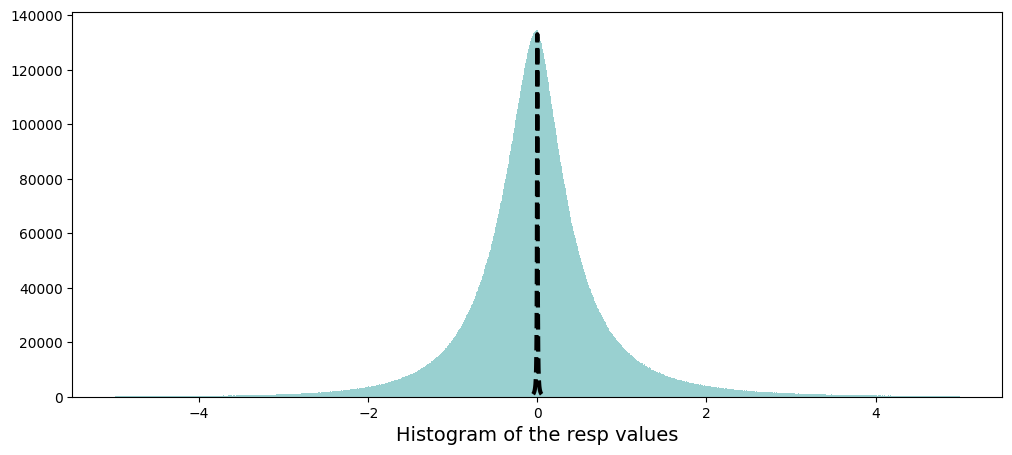

In [11]:
from scipy.optimize import curve_fit
# the values
x = list(range(len(values)))
x = [((i)-1500)/30000 for i in x]
y = values

def Lorentzian(x, x0, gamma, A):
    return A * gamma**2/(gamma**2+( x - x0 )**2)

# seed guess
initial_guess=(0, 0.001, 3000)

# the fit
parameters,covariance=curve_fit(Lorentzian,x,y,initial_guess)
sigma=np.sqrt(np.diag(covariance))

# and plot
plt.figure(figsize = (12,5))
ax = sns.distplot(train_data['responder_6'], 
            bins=3000, 
            kde_kws={"clip":(-5,5)}, 
            hist_kws={"range":(-5,5)},
            color='darkcyan', 
            kde=False);
values = np.array([rec.get_height() for rec in ax.patches])
#norm = plt.Normalize(values.min(), values.max())
#colors = plt.cm.jet(norm(values))
#for rec, col in zip(ax.patches, colors):
#    rec.set_color(col)
plt.xlabel("Histogram of the resp values", size=14)
plt.plot(x,Lorentzian(x,*parameters),'--',color='black',lw=3)
plt.show();
del values
gc.collect();

Weight

In [12]:
# Calculate the number of zero weights
num_zero_weights = (train_data['weight'] == 0).sum().compute()  # Compute the total number of zero weights
total_weights = train_data.shape[0].compute()  # Compute the total number of rows

# Calculate the percentage of zero weights
percent_zeros = (100 * num_zero_weights) / total_weights

print('Percentage of zero weights is: %.2f%%' % percent_zeros)

Percentage of zero weights is: 0.00%


In [13]:
min_weight = train_data['weight'].min().compute()
print('The minimum weight is: %.2f' % min_weight)

The minimum weight is: 0.15


In [14]:
max_weight = train_data['weight'].max().compute()
print('The maximum weight was: %.2f' % max_weight)

The maximum weight was: 10.24


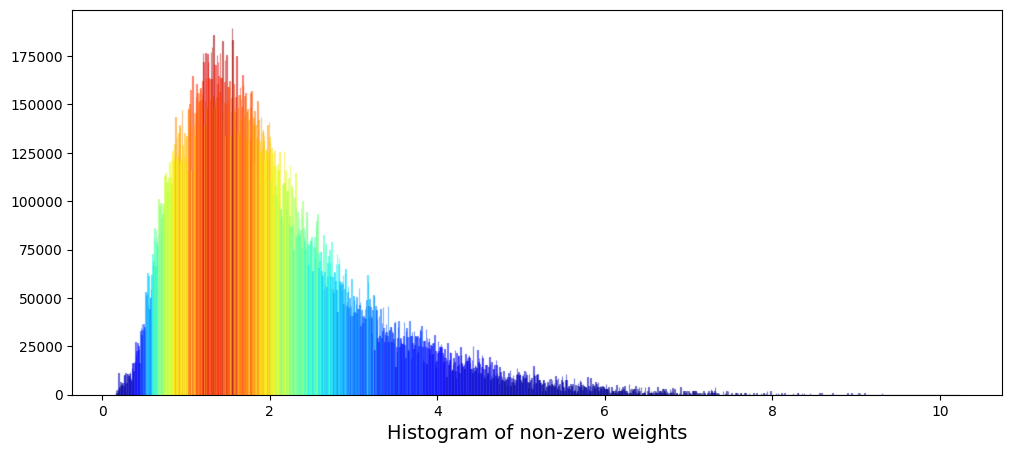

In [15]:
plt.figure(figsize = (12,5))
ax = sns.distplot(train_data['weight'], 
            bins=1400, 
            kde_kws={"clip":(0.15,10.24)}, 
            hist_kws={"range":(0.15,10.24)},
            color='darkcyan', 
            kde=False);
values = np.array([rec.get_height() for rec in ax.patches])
norm = plt.Normalize(values.min(), values.max())
colors = plt.cm.jet(norm(values))
for rec, col in zip(ax.patches, colors):
    rec.set_color(col)
plt.xlabel("Histogram of non-zero weights", size=14)
plt.show();
del values
gc.collect();

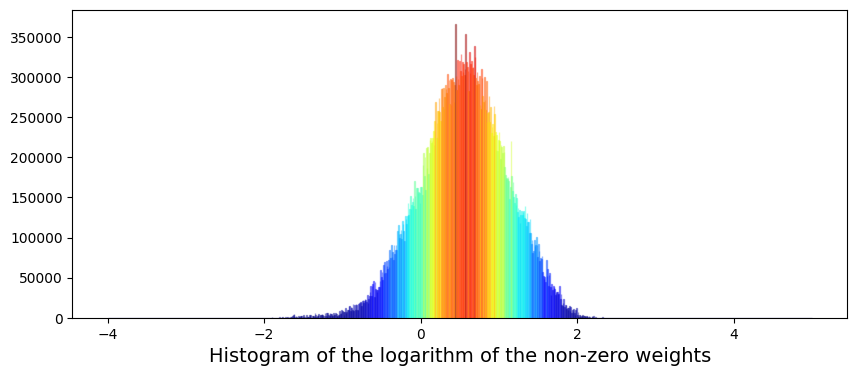

In [17]:
train_data_nonZero = train_data.query('weight > 0').reset_index(drop = True)
plt.figure(figsize = (10,4))
ax = sns.distplot(np.log(train_data_nonZero['weight']), 
            bins=1000, 
            kde_kws={"clip":(-4,5)}, 
            hist_kws={"range":(-4,5)},
            color='darkcyan', 
            kde=False);
values = np.array([rec.get_height() for rec in ax.patches])
norm = plt.Normalize(values.min(), values.max())
colors = plt.cm.jet(norm(values))
for rec, col in zip(ax.patches, colors):
    rec.set_color(col)
plt.xlabel("Histogram of the logarithm of the non-zero weights", size=14)
plt.show();
gc.collect();

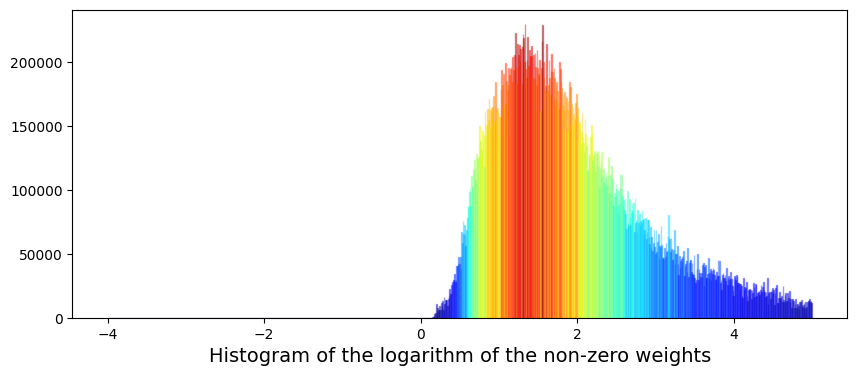

In [18]:
train_data_nonZero = train_data.query('weight > 0').reset_index(drop = True)
plt.figure(figsize = (10,4))
ax = sns.distplot(train_data_nonZero['weight'], 
            bins=1000, 
            kde_kws={"clip":(-4,5)}, 
            hist_kws={"range":(-4,5)},
            color='darkcyan', 
            kde=False);
values = np.array([rec.get_height() for rec in ax.patches])
norm = plt.Normalize(values.min(), values.max())
colors = plt.cm.jet(norm(values))
for rec, col in zip(ax.patches, colors):
    rec.set_color(col)
plt.xlabel("Histogram of the logarithm of the non-zero weights", size=14)
plt.show();
gc.collect();